<a href="https://colab.research.google.com/github/leofls/Linear_Regression/blob/master/Regress%C3%A3o_Linear_Leandro_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# bibliotecas
import pandas as pd
import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import numpy as np

#biblioteca do temporizador
import time
from functools import wraps

In [57]:

start_time = time.time()
#dados
address = '/content/drive/My Drive/Colab Notebooks/Tcaixas - Valor.csv'
 
dados = pd.read_csv(address, encoding="UTF-8", sep=";")
 
df1 = pd.DataFrame(dados)
time_Dataset = time.time() - start_time
 
df1.head()

,Item,Altura,Largura,Profundidade,Saida,Valor
0,1,1,1,2,pequena,4
1,2,3,3,1,pequena,17
2,3,27,26,23,media,24365
3,4,28,4,3,media,508
4,5,4,10,6,pequena,243


In [58]:
start_time = time.time()
# Verificando correlação
df1.corr()
time_Dataset_corr = time.time() - start_time

In [59]:
#Calculando os Volumes das caixas e adicionando uma coluna volume
start_time = time.time()
Volume = dados['Altura'] * dados['Largura'] * dados['Profundidade']
dados.insert(loc=len(dados.columns), column="Volume",value=Volume )
time_volume = time.time() - start_time
dados.head()

,Item,Altura,Largura,Profundidade,Saida,Valor,Volume
0,1,1,1,2,pequena,4,2
1,2,3,3,1,pequena,17,9
2,3,27,26,23,media,24365,16146
3,4,28,4,3,media,508,336
4,5,4,10,6,pequena,243,240


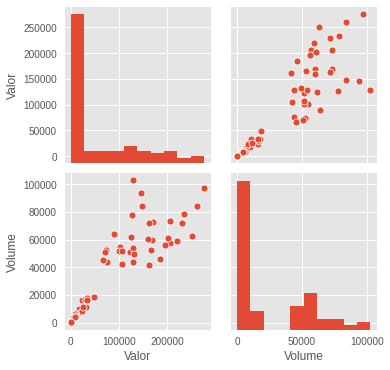

In [60]:
# importando e plotando o grafico para verificar relação
start_time = time.time()

dadosnew = dados.loc[:,'Valor':'Volume']

sb.pairplot(dadosnew)
time_data_view = time.time() - start_time

In [61]:
start_time = time.time()

# pegando as colunas volume e Valor 
X = df1.iloc[:, 6].values
y = df1.iloc[:, 5].values

#verificando a coorelação com Nunpy
correlacao = np.corrcoef(X, y)
print('Correlação(R2): ', correlacao.item(1))

#  Aplicando o reshape para alterar a quantidade de dimensões
X= X.reshape(-1,1)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

# b0
print('Intercepto (a): ', regressor.coef_)

# b1
print('Inclinação (b): ',regressor.intercept_)

time_corr_vol_valor = time.time() - start_time

Correlação(R2):  0.9181611764404379
Intercepto (a):  [2.4010921]
Inclinação (b):  580.1533364116331


In [62]:
# Treinando a recressão
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

# instanciando regressor para verificar a regreção linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# teste de predição setando resultados
y_pred = regressor.predict(X_test)

time_Train_Test_sets = time.time() - start_time

In [63]:
start_time = time.time()
# b0
print('Intercepto (a): ', regressor.coef_)

# b1
print('Inclinação (b): ',regressor.intercept_)

# R
print('Correlação(R2): ', r2_score(y_test, y_pred))
time_show_values = time.time() - start_time

Intercepto (a):  [2.29335363]
Inclinação (b):  2257.8816486333235
Correlação(R2):  0.8869138056671824


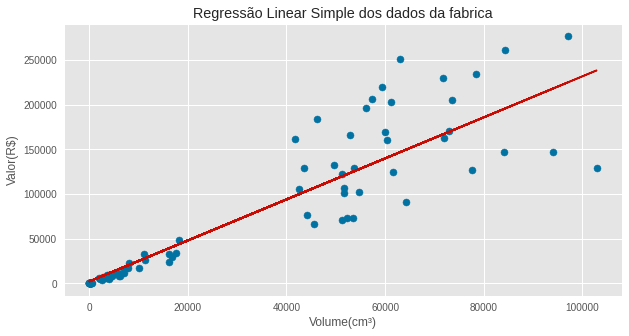

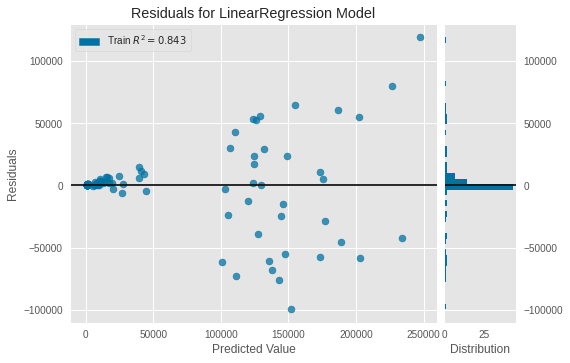

In [64]:
#plotando graficos
start_time = time.time()

plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.scatter(X,y, color="b")
plt.plot(X, regressor.predict(X), color='r')
plt.title('Regressão Linear Simple dos dados da fabrica')
plt.xlabel('Volume(cm³)')
plt.ylabel('Valor(R$)')
plt.show()

print("\n")

from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor)
visualizador.fit(X, y)
visualizador.poof()

time_graph = time.time() - start_time


# Tempo de cada execução do algoritmo

In [65]:
#tempo de cada execução do algoritmo
print("Load Dataset:                                %.4f" % time_Dataset, "segundos.")
print("Data set Corr:                               %.4f" % time_Dataset_corr, "segundos.")
print("Calculating volume:                          %.4f" % time_volume, "segundos.")
print("Visualization graph:                         %.4f" % time_data_view, "segundos.")
print("Correlation Valor and Vol:                   %.4f" % time_corr_vol_valor, "segundos.")
print("Split Train Test sets:                       %.4f" % time_Train_Test_sets, "segundos.")
print("Time to show Values:                         %.4f" % time_show_values, "segundos.")
print("Print a decision tree:                       %.4f" % time_graph, "segundos.")
print("prediction Test:                             %.4f" % time_prediction, "segundos.")

Load Dataset:                                0.0070 segundos.
Data set Corr:                               0.0011 segundos.
Calculating volume:                          0.0037 segundos.
Visualization graph:                         0.3027 segundos.
Correlation Valor and Vol:                   0.0023 segundos.
Split Train Test sets:                       0.0049 segundos.
Time to show Values:                         0.0036 segundos.
Print a decision tree:                       0.6216 segundos.
prediction Test:                             0.0015 segundos.
